In [3]:
import numpy as np
from pylab import imshow, show
from timeit import default_timer as timer

In [28]:
def mandel_non(x, y, max_iters):
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i

  return max_iters

In [20]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandel(real, imag, iters)
      image[y, x] = color

Mandelbrot created in 5.879989 s


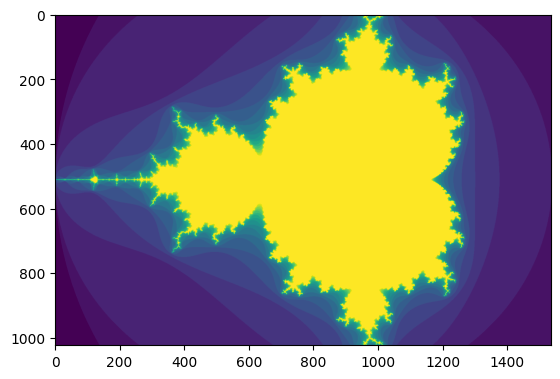

In [21]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in %f s" % dt)
imshow(image)
show()

You can play with the coordinates to zoom in on different regions in the fractal.

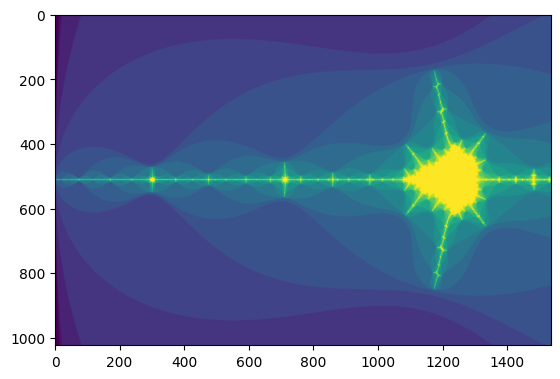

In [7]:
create_fractal(-2.0, -1.7, -0.1, 0.1, image, 20) 
imshow(image)
show()

## Faster Execution with Numba

In [55]:
from numba import jit, prange


@jit(nopython=True, cache=True)
def mandel(x, y, max_iters):
  c = complex(x, y)
  z = 0.0j
  for i in prange(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i

  return max_iters

@jit(nopython=True,cache=True, parallel=True)
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height

  for x in prange(width):
    real = min_x + x * pixel_size_x
    for y in prange(height):
      imag = min_y + y * pixel_size_y
      color = mandel(real, imag, iters)
      image[y, x] = color

Let's run the `@jit` code and see if it is faster.

In [49]:
image = np.zeros((1024, 1536), dtype = np.uint8)

In [60]:
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

In [ ]:
imshow(image)
show()

In [61]:
5.299538/0.075/80

0.8832563333333334